![Mandel.png](Mandel.png)

The Mandelbrot Set
===

The Mandelbrot set is a well known mathematical object. You can read about it on [Wikipedia](http://en.wikipedia.org/wiki/Mandelbrot_set). There are also "deep zooms" on YouTube exploring never before seen regions of the set.

We're going to explore how to plot it.

---

[0]: http://en.wikipedia.org/wiki/Mandelbrot_set

In [1]:
# necessary imports
%matplotlib inline
import numpy as np
import pylab as plt

Below, we're defining the python function that will apply the Mandelbrot map:

$$f_{n+1} = f_n^2 + z,\qquad f_0 = 0, \qquad n\in\mathbb{N},z\in\mathbb{C}.$$

For a given complex number $z$, $z$ is a member of the Mandelbrot set if and only if the magnitude of $z$ stays bounded as $n\to\infty$.

In [2]:
def f(z, n=100, power=2):
    f = z
    for i in range(1,n):
        f = f**power + z
    return f

The python function above is evaluated on a grid defined in the next cell. The density of this grid has a quadratic effect on the computation time (up until a critical $N$).

In [10]:
N = 5000
x = np.linspace(-1.7,0.6, N)
y = np.linspace(-1.4,1.4, N)
X,Y = np.meshgrid(x,y,indexing='ij')
# Complex Domain
Z = X+1j*Y

Below comes the loop that evaluates the function `f` on the previously defined grid. This is the part of the program that takes time.

  N  | Wall Time | Machine 
----:|:---------:|:--------
  50 |    2.4 ms | s72-2
 500 |   97.1 ms | s72-2
5000 |   24.1 s  | s72-2

In [4]:
%%time
data = np.zeros(Z.shape)
for i,xi in enumerate(x):
    for j,yj in enumerate(y):
        data[i,j] = f(xi+1j*yj,power=2)


CPU times: user 151 ms, sys: 1.91 ms, total: 153 ms
Wall time: 158 ms


/home/jyalim/.conda/envs/pyintel/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in cdouble_scalars
  after removing the cwd from sys.path.
/home/jyalim/.conda/envs/pyintel/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in cdouble_scalars
  after removing the cwd from sys.path.
/home/jyalim/.conda/envs/pyintel/lib/python3.6/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


In [11]:

%%time
data = f(Z,power=2)

/home/jyalim/.conda/envs/pyintel/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
/home/jyalim/.conda/envs/pyintel/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in square
  after removing the cwd from sys.path.


CPU times: user 12.8 s, sys: 15.8 s, total: 28.6 s
Wall time: 28.6 s


Finally, we can plot the computed boundaries of the Mandelbrot set with the following code.

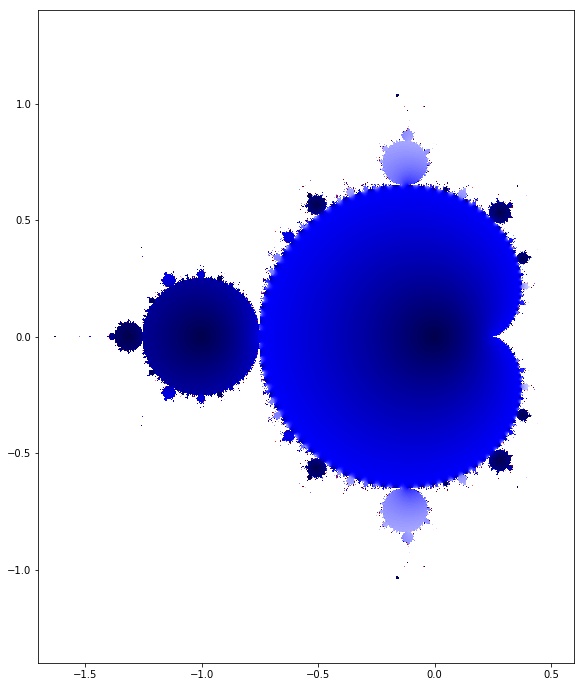

In [12]:
extent = (x[0],x[-1],y[0],y[-1])
plt.figure(figsize=(16,12))
plt.imshow(np.abs(data.T), vmin=0,vmax=2,cmap=plt.cm.seismic,extent=extent)

In [13]:
def plot_vmax(vmax=0.2, cmap='hot'):
    plt.imshow(abs(data.T), cmap=cmap,  vmax=vmax, extent=extent)
    return None

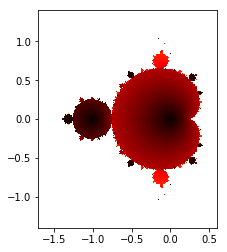

In [14]:
plot_vmax(vmax=2)

Some more plots that the original author liked:

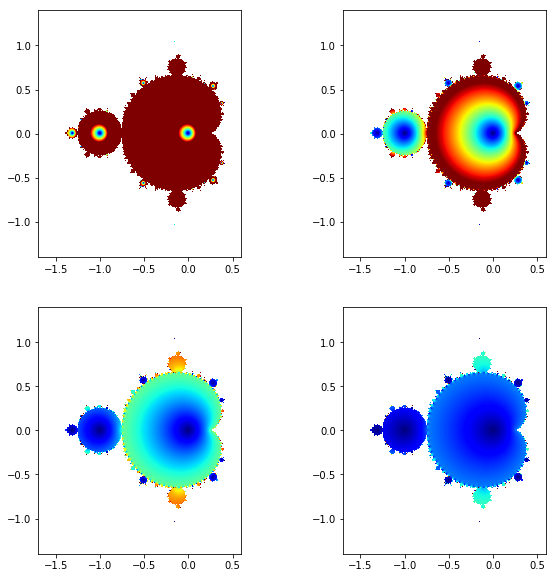

In [15]:
plt.figure(figsize=(10, 10))
for sub, vmax in enumerate([0.1, 0.45, 1.05, 2.]):
    plt.subplot(2, 2, sub + 1)
    plot_vmax(vmax, 'jet')

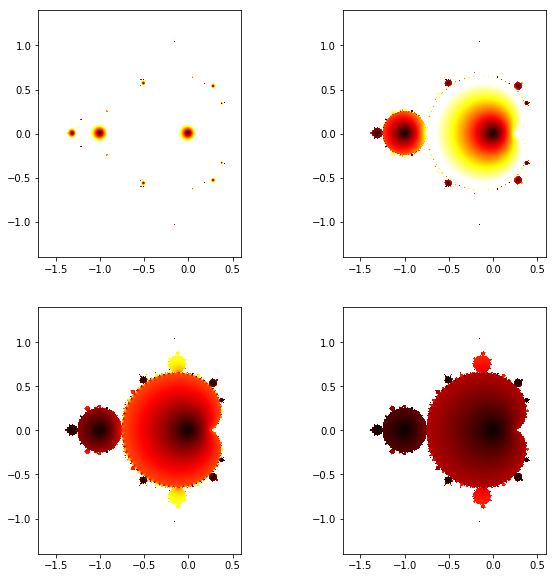

In [16]:
plt.figure(figsize=(10, 10))
for sub, vmax in enumerate([0.1, 0.45, 1.05, 2.]):
    plt.subplot(2, 2, sub + 1)
    plot_vmax(vmax, 'hot')

- - -
Adapted from [https://nbviewer.jupyter.org/github/flothesof/posts/blob/master/20140417_Mandelbrot.ipynb](https://nbviewer.jupyter.org/github/flothesof/posts/blob/master/20140417_Mandelbrot.ipynb)